In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


# **Data Inspection and Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import uniform

## Load Dataset

In [ ]:
df = pd.read_csv('/content/Asteroid_Dataset.csv')

<ipython-input-4-8a4f76190b80>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Asteroid_Dataset.csv')


In [ ]:
print(df.shape)

(126131, 35)


## Data Overview

In [ ]:
df.head(3)

,spkid,full_name,pha,H,diameter,albedo,diameter_sigma,e,a,q,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,' 1 Ceres',N,3.40,939.4,0.090,0.2,0.077557,2.767657,2.553006,...,4.613200e-09,6.176900e-08,6.618400e-08,7.355900e-09,1.115900e-11,1.201400e-12,3.686700e-08,9.439100e-09,MBA,0.40633
1,2000002,' 2 Pallas',N,4.20,545.0,0.101,18.0,0.229972,2.773841,2.135935,...,3.701900e-06,6.412400e-06,9.494400e-06,9.151500e-06,5.054200e-09,4.740800e-10,4.219400e-05,3.749600e-06,MBA,0.36151
2,2000003,' 3 Juno',N,5.33,246.596,0.214,10.594000000000001,0.256936,2.668285,1.982706,...,3.232100e-06,1.687400e-05,1.795300e-05,8.114300e-06,4.413000e-09,4.463100e-10,3.530500e-05,3.142200e-06,MBA,0.33306


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spkid           86584 non-null  int64  
 1   full_name       86584 non-null  object 
 2   pha             86584 non-null  object 
 3   H               86584 non-null  float64
 4   diameter        86584 non-null  object 
 5   albedo          86584 non-null  float64
 6   diameter_sigma  86584 non-null  object 
 7   e               86584 non-null  float64
 8   a               86584 non-null  float64
 9   q               86584 non-null  float64
 10  i               86584 non-null  float64
 11  om              86584 non-null  float64
 12  w               86584 non-null  float64
 13  ma              86584 non-null  float64
 14  ad              86584 non-null  float64
 15  n               86584 non-null  float64
 16  tp              86584 non-null  float64
 17  tp_cal          86584 non-null 

In [ ]:
print(df.isnull().sum())

spkid             0
full_name         0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


In [ ]:
print(df.isnull().sum().sum())

0


There are no missing values in the dataset

## Type Conversion

In [ ]:
df['diameter'] = pd.to_numeric(df['diameter'], errors='coerce')

In [ ]:
df['diameter_sigma'] = pd.to_numeric(df['diameter_sigma'], errors='coerce')

## Clean String Columns

In [ ]:
df['full_name'] = df['full_name'].str.strip().str.replace("'", "", regex=False)

In [ ]:
df['pha'] = df['pha'].str.strip()

## Verify Conversion

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spkid           86584 non-null  int64  
 1   full_name       86584 non-null  object 
 2   pha             86584 non-null  object 
 3   H               86584 non-null  float64
 4   diameter        86583 non-null  float64
 5   albedo          86584 non-null  float64
 6   diameter_sigma  86492 non-null  float64
 7   e               86584 non-null  float64
 8   a               86584 non-null  float64
 9   q               86584 non-null  float64
 10  i               86584 non-null  float64
 11  om              86584 non-null  float64
 12  w               86584 non-null  float64
 13  ma              86584 non-null  float64
 14  ad              86584 non-null  float64
 15  n               86584 non-null  float64
 16  tp              86584 non-null  float64
 17  tp_cal          86584 non-null 

In [ ]:
print(df.isnull().sum())

spkid             0
full_name         0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


drop rows where the diameter missing values are found

In [ ]:
df = df.dropna(subset=['diameter'])
print(df.isnull().sum())

spkid              0
full_name          0
pha                0
H                  0
diameter           0
albedo             0
diameter_sigma    91
e                  0
a                  0
q                  0
i                  0
om                 0
w                  0
ma                 0
ad                 0
n                  0
tp                 0
tp_cal             0
per                0
per_y              0
moid               0
moid_ld            0
sigma_e            0
sigma_a            0
sigma_q            0
sigma_i            0
sigma_om           0
sigma_w            0
sigma_ma           0
sigma_ad           0
sigma_n            0
sigma_tp           0
sigma_per          0
class              0
rms                0
dtype: int64


filling the missing values with median for diameter_sigma column

In [ ]:
median_sigma = df['diameter_sigma'].median()
df['diameter_sigma'].fillna(median_sigma, inplace=True)

<ipython-input-15-01f641b4ec3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diameter_sigma'].fillna(median_sigma, inplace=True)
<ipython-input-15-01f641b4ec3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diameter_sigma'].fillna(median_sigma, inplace=True)


In [ ]:
print(df.isnull().sum())

spkid             0
full_name         0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


## Final overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86583 entries, 0 to 86583
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spkid           86583 non-null  int64  
 1   full_name       86583 non-null  object 
 2   pha             86583 non-null  object 
 3   H               86583 non-null  float64
 4   diameter        86583 non-null  float64
 5   albedo          86583 non-null  float64
 6   diameter_sigma  86583 non-null  float64
 7   e               86583 non-null  float64
 8   a               86583 non-null  float64
 9   q               86583 non-null  float64
 10  i               86583 non-null  float64
 11  om              86583 non-null  float64
 12  w               86583 non-null  float64
 13  ma              86583 non-null  float64
 14  ad              86583 non-null  float64
 15  n               86583 non-null  float64
 16  tp              86583 non-null  float64
 17  tp_cal          86583 non-null  floa

# **EDA**

In [ ]:
print(df['diameter'].describe())

count    86583.000000
mean         6.617941
std         11.571597
min          0.163000
25%          3.160000
50%          4.617000
75%          6.813000
max        939.400000
Name: diameter, dtype: float64


In order to stabilize variance and enhance model performance, we may need to manage outliers or implement a transformation (such as logarithmic) due to the extreme high values in the diameter distribution.

In [ ]:
df['log_diameter'] = np.log1p(df['diameter'])

In [ ]:
print(df['log_diameter'].describe())

count    86583.000000
mean         1.795105
std          0.561879
min          0.151003
25%          1.425515
50%          1.725798
75%          2.055789
max          6.846305
Name: log_diameter, dtype: float64


In [ ]:
print(df['H'].describe())

count    86583.000000
mean        14.582491
std          1.247804
min          3.000000
25%         14.000000
50%         14.700000
75%         15.400000
max         21.100000
Name: H, dtype: float64


In [ ]:
print(df['albedo'].describe())

count    86583.000000
mean         0.162058
std          0.120380
min          0.001000
25%          0.063000
50%          0.121000
75%          0.244000
max          1.000000
Name: albedo, dtype: float64


##  Visualizing Distributions

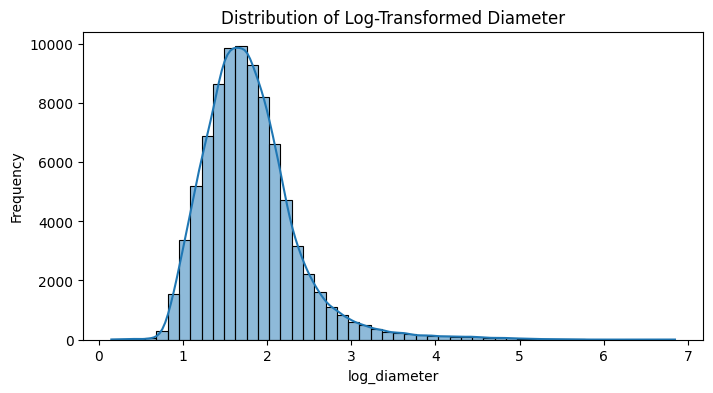

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['log_diameter'], kde=True, bins=50)
plt.title("Distribution of Log-Transformed Diameter")
plt.xlabel("log_diameter")
plt.ylabel("Frequency")
plt.show()

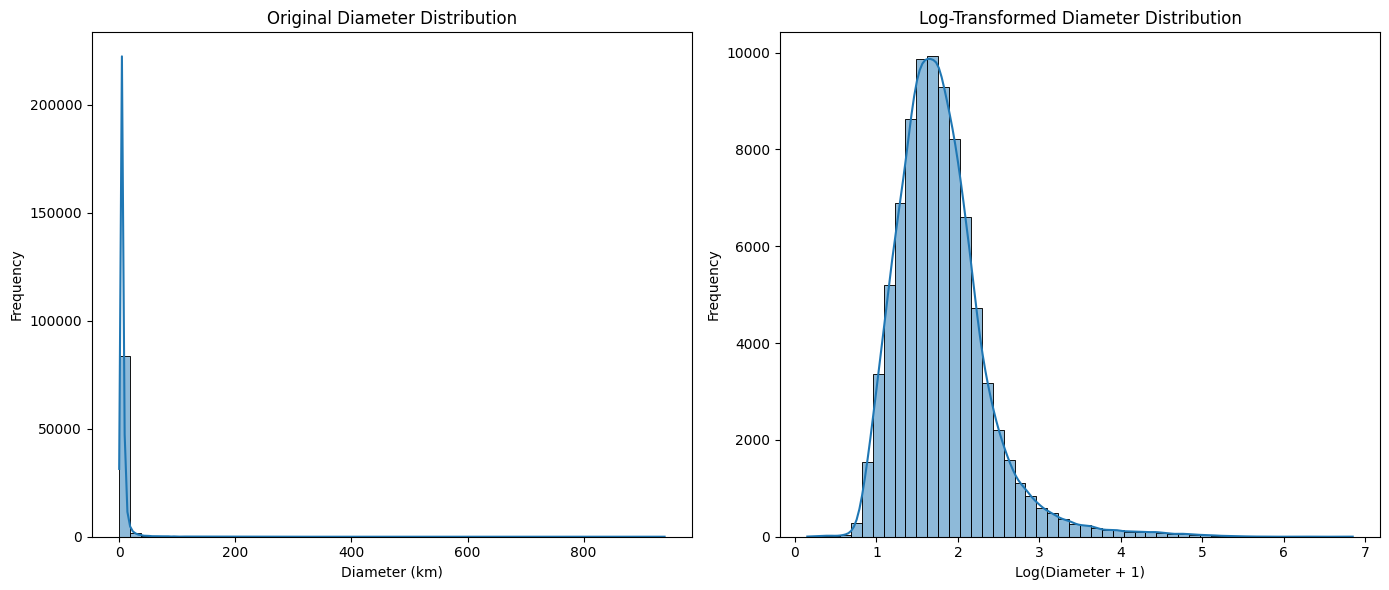

In [ ]:
# Plot histograms for original and log-transformed diameter side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['diameter'], kde=True, bins=50)
plt.title("Original Diameter Distribution")
plt.xlabel("Diameter (km)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df['log_diameter'], kde=True, bins=50)
plt.title("Log-Transformed Diameter Distribution")
plt.xlabel("Log(Diameter + 1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

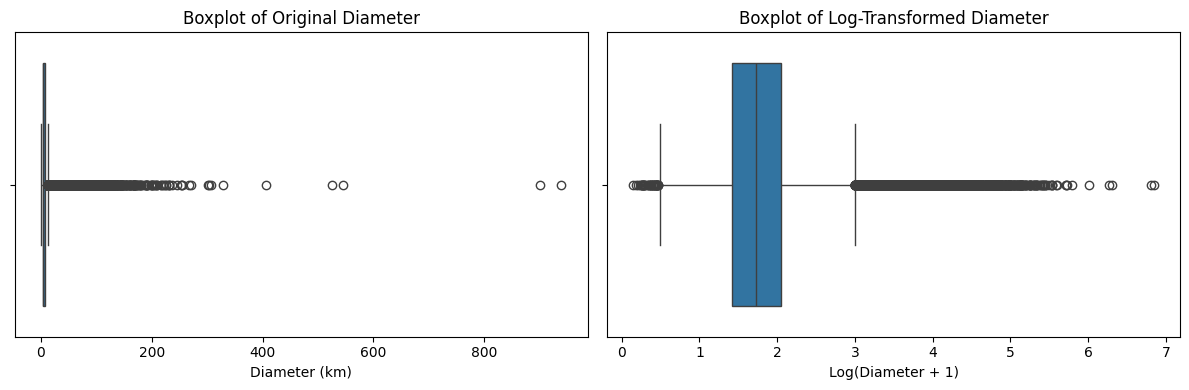

In [ ]:
# Boxplots for additional visual inspection
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['diameter'])
plt.title("Boxplot of Original Diameter")
plt.xlabel("Diameter (km)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_diameter'])
plt.title("Boxplot of Log-Transformed Diameter")
plt.xlabel("Log(Diameter + 1)")

plt.tight_layout()
plt.show()

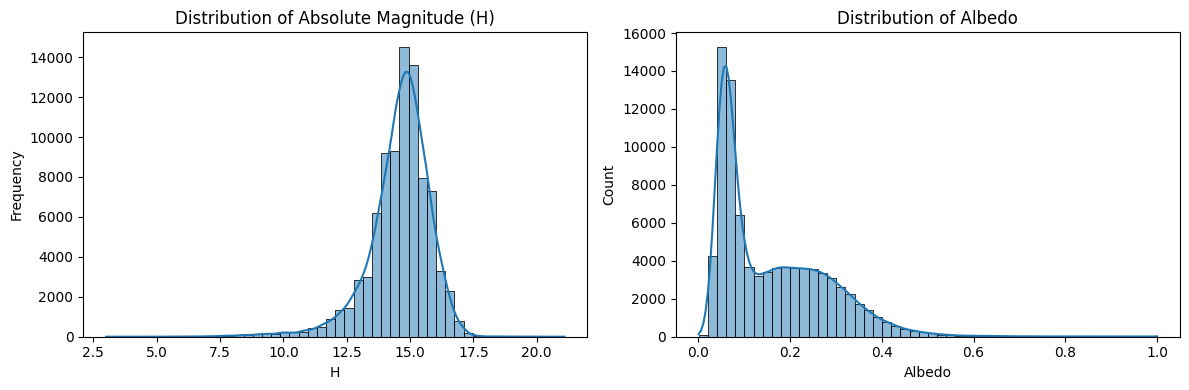

In [ ]:
# Distribution for H and albedo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['H'], kde=True, bins=50)
plt.title("Distribution of Absolute Magnitude (H)")
plt.xlabel("H")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df['albedo'], kde=True, bins=50)
plt.title("Distribution of Albedo")
plt.xlabel("Albedo")

plt.tight_layout()
plt.show()

## Correlation Analysis


Correlation Matrix (Including Log-Transformed Diameter)
              log_diameter         H    albedo         e         a         q  \
log_diameter      1.000000 -0.841531 -0.451604 -0.068479  0.472763  0.497406   
H                -0.841531  1.000000 -0.033068  0.108907 -0.353304 -0.390555   
albedo           -0.451604 -0.033068  1.000000 -0.020208 -0.309368 -0.307500   
e                -0.068479  0.108907 -0.020208  1.000000 -0.102813 -0.498485   
a                 0.472763 -0.353304 -0.309368 -0.102813  1.000000  0.842702   
q                 0.497406 -0.390555 -0.307500 -0.498485  0.842702  1.000000   
i                 0.208229 -0.214510 -0.013565  0.091104  0.162971  0.111284   

                     i  
log_diameter  0.208229  
H            -0.214510  
albedo       -0.013565  
e             0.091104  
a             0.162971  
q             0.111284  
i             1.000000  


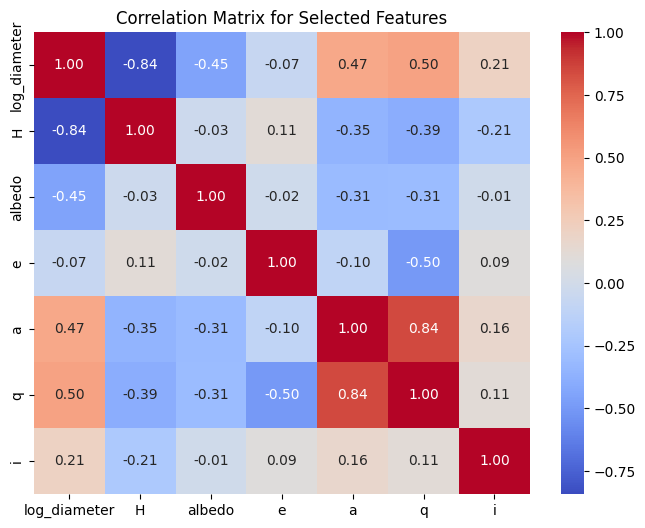

In [ ]:
# Selecting a subset of key features for correlation analysis
features = ['log_diameter', 'H', 'albedo', 'e', 'a', 'q', 'i']
corr_matrix = df[features].corr()
print("\nCorrelation Matrix (Including Log-Transformed Diameter)")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Selected Features")
plt.show()

## Scatter Plots to Explore Relationships

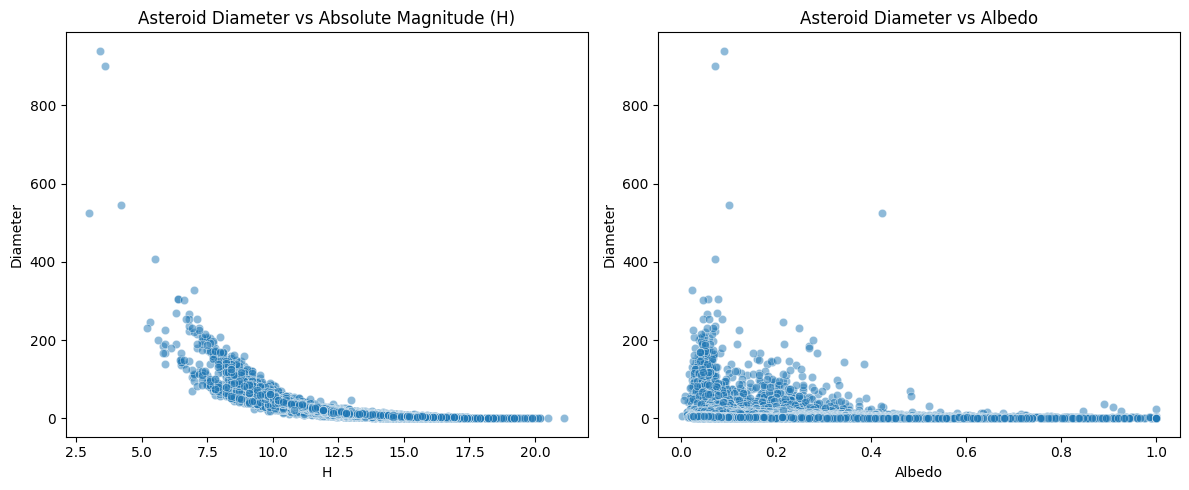

In [ ]:
# Scatter plot to original diameter
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='H', y='diameter', data=df, alpha=0.5)
plt.title("Asteroid Diameter vs Absolute Magnitude (H)")
plt.xlabel("H")
plt.ylabel("Diameter")

plt.subplot(1, 2, 2)
sns.scatterplot(x='albedo', y='diameter', data=df, alpha=0.5)
plt.title("Asteroid Diameter vs Albedo")
plt.xlabel("Albedo")
plt.ylabel("Diameter")

plt.tight_layout()
plt.show()

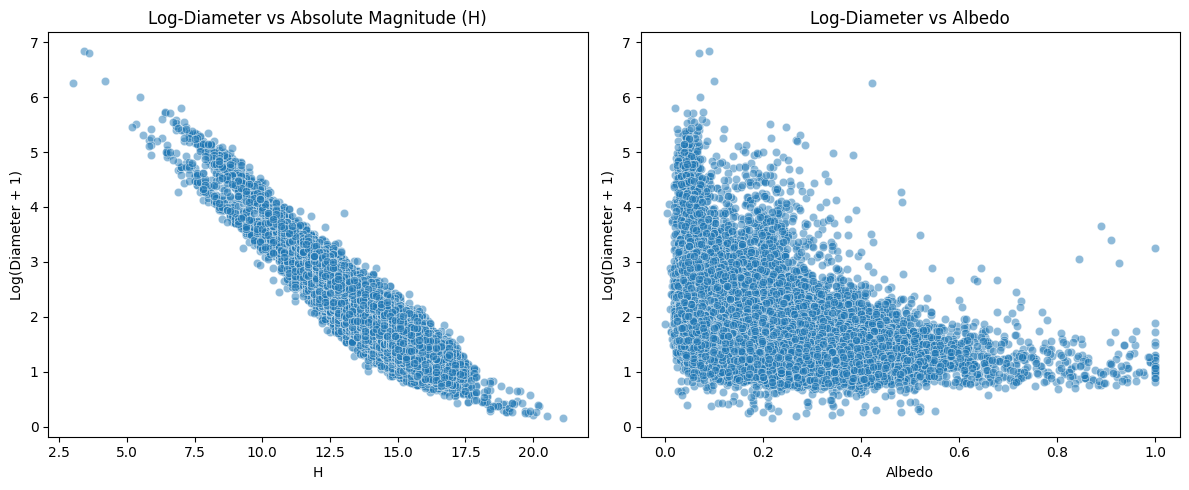

In [ ]:
# Scatter plot to Log-transformed diameter
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='H', y='log_diameter', data=df, alpha=0.5)
plt.title("Log-Diameter vs Absolute Magnitude (H)")
plt.xlabel("H")
plt.ylabel("Log(Diameter + 1)")

plt.subplot(1, 2, 2)
sns.scatterplot(x='albedo', y='log_diameter', data=df, alpha=0.5)
plt.title("Log-Diameter vs Albedo")
plt.xlabel("Albedo")
plt.ylabel("Log(Diameter + 1)")

plt.tight_layout()
plt.show()

# **Feature Engineering & Selection**

Creating a new feature computed_diameter using the standard formula:\
d = 1329 / sqrt(albedo) * 10^(-0.2 * H)

In [ ]:
df['computed_diameter'] = 1329 / np.sqrt(df['albedo']) * (10 ** (-0.2 * df['H']))

a log-transformed version of computed_diameter to compare with log_diameter

In [ ]:
df['log_computed_diameter'] = np.log1p(df['computed_diameter'])

## Feature Selection Preparation

In [ ]:
cols_to_drop = ['spkid', 'full_name', 'pha', 'diameter']
df_model = df.drop(columns=cols_to_drop)

potential predictor features:

In [ ]:
potential_features = [
    'H', 'albedo', 'computed_diameter', 'log_computed_diameter',
    'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal',
    'per', 'per_y', 'moid', 'moid_ld',
    'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
    'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms'
]

## Assessing Feature Correlations

In [ ]:
# correlation of each candidate feature with the target: log_diameter
corr_with_target = df_model[potential_features + ['log_diameter']].corr()['log_diameter'].abs().sort_values(ascending=False)
print("Correlation of potential features with log_diameter:")
print(corr_with_target)

Correlation of potential features with log_diameter:
log_diameter             1.000000
log_computed_diameter    0.988759
H                        0.841531
computed_diameter        0.682216
n                        0.544848
moid                     0.502812
moid_ld                  0.502812
q                        0.497406
a                        0.472763
albedo                   0.451604
rms                      0.387874
ad                       0.383644
per                      0.270796
per_y                    0.270796
i                        0.208229
e                        0.068479
sigma_ma                 0.056354
sigma_om                 0.044327
sigma_tp                 0.042280
sigma_q                  0.042225
sigma_e                  0.039315
sigma_n                  0.035699
sigma_a                  0.030965
sigma_ad                 0.028715
sigma_per                0.028463
sigma_i                  0.016682
ma                       0.012620
sigma_w                  0.01

## Finalize Feature Selection and Prepare Data for Modeling

In [ ]:
selected_features = ['H', 'albedo', 'n']

In [ ]:
# Prepare the predictor (X) and target (y) variables
X = df_model[selected_features]
y = df_model['log_diameter']

Checking the correlation matrix for the selected features with the target

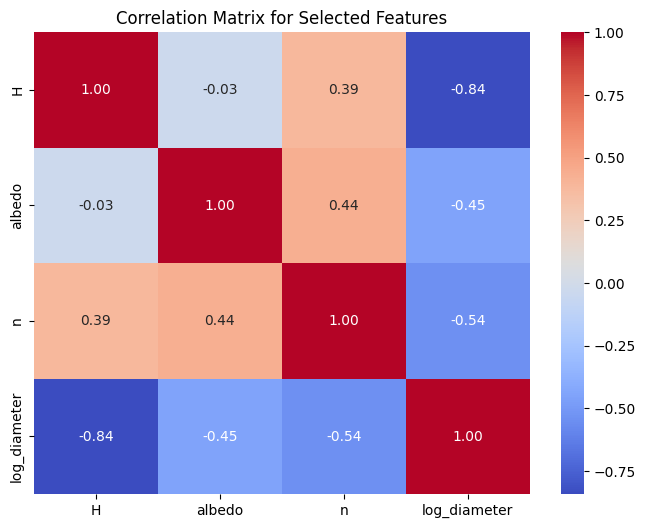

In [ ]:
selected_corr = df_model[selected_features + ['log_diameter']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Selected Features")
plt.show()

# **Data Splitting**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=1, shuffle=True)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (69266, 3) (69266,)
Validation set shape: (8658, 3) (8658,)
Test set shape: (8659, 3) (8659,)


# **Model Building**

In [ ]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(max_depth=10, random_state=1)
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, objective='reg:squarederror', random_state=1)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')

In [ ]:
models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Decision Tree": dt_model,
    "AdaBoost": ada_model,
    "XGBoost": xgb_model,
    "SVR": svr_model,
    "KNN": knn_model
}

In [ ]:
# Function to train and evaluate a model
def train_and_evaluate_model(model_name, model, X_train, y_train, X_val, y_val):
    print(f"\nTraining {model_name}...")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)  # Added MAE

    # Print evaluation metrics
    print(f"{model_name} - Validation RMSE: {rmse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

    # Return the evaluation metrics for potential later use
    return rmse, r2, mae

In [ ]:
# Initialize a dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    rmse, r2, mae = train_and_evaluate_model(model_name, model, X_train, y_train, X_val, y_val)
    results[model_name] = {'RMSE': rmse, 'R²': r2, 'MAE': mae}


Training Linear Regression...
Linear Regression - Validation RMSE: 0.1429, R²: 0.9356, MAE: 0.1042

Training Random Forest...
Random Forest - Validation RMSE: 0.0810, R²: 0.9793, MAE: 0.0589

Training Gradient Boosting...
Gradient Boosting - Validation RMSE: 0.0776, R²: 0.9810, MAE: 0.0564

Training Decision Tree...
Decision Tree - Validation RMSE: 0.0813, R²: 0.9791, MAE: 0.0594

Training AdaBoost...
AdaBoost - Validation RMSE: 0.1797, R²: 0.8982, MAE: 0.1435

Training XGBoost...
XGBoost - Validation RMSE: 0.0751, R²: 0.9822, MAE: 0.0540

Training SVR...
SVR - Validation RMSE: 0.0831, R²: 0.9782, MAE: 0.0617

Training KNN...
KNN - Validation RMSE: 0.0835, R²: 0.9780, MAE: 0.0604


In [ ]:
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")


Linear Regression:
RMSE: 0.1429
R²: 0.9356
MAE: 0.1042

Random Forest:
RMSE: 0.0810
R²: 0.9793
MAE: 0.0589

Gradient Boosting:
RMSE: 0.0776
R²: 0.9810
MAE: 0.0564

Decision Tree:
RMSE: 0.0813
R²: 0.9791
MAE: 0.0594

AdaBoost:
RMSE: 0.1797
R²: 0.8982
MAE: 0.1435

XGBoost:
RMSE: 0.0751
R²: 0.9822
MAE: 0.0540

SVR:
RMSE: 0.0831
R²: 0.9782
MAE: 0.0617

KNN:
RMSE: 0.0835
R²: 0.9780
MAE: 0.0604


In [ ]:
# Model names and metrics
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting',
              'Decision Tree', 'AdaBoost', 'XGBoost', 'SVR', 'KNN']
rmse_values = [0.1429, 0.0810, 0.0776, 0.0813, 0.1797, 0.0751, 0.0831, 0.0835]
r2_values = [0.9356, 0.9793, 0.9810, 0.9791, 0.8982, 0.9822, 0.9782, 0.9780]
mae_values = [0.1042, 0.0589, 0.0564, 0.0594, 0.1435, 0.0540, 0.0617, 0.0604]

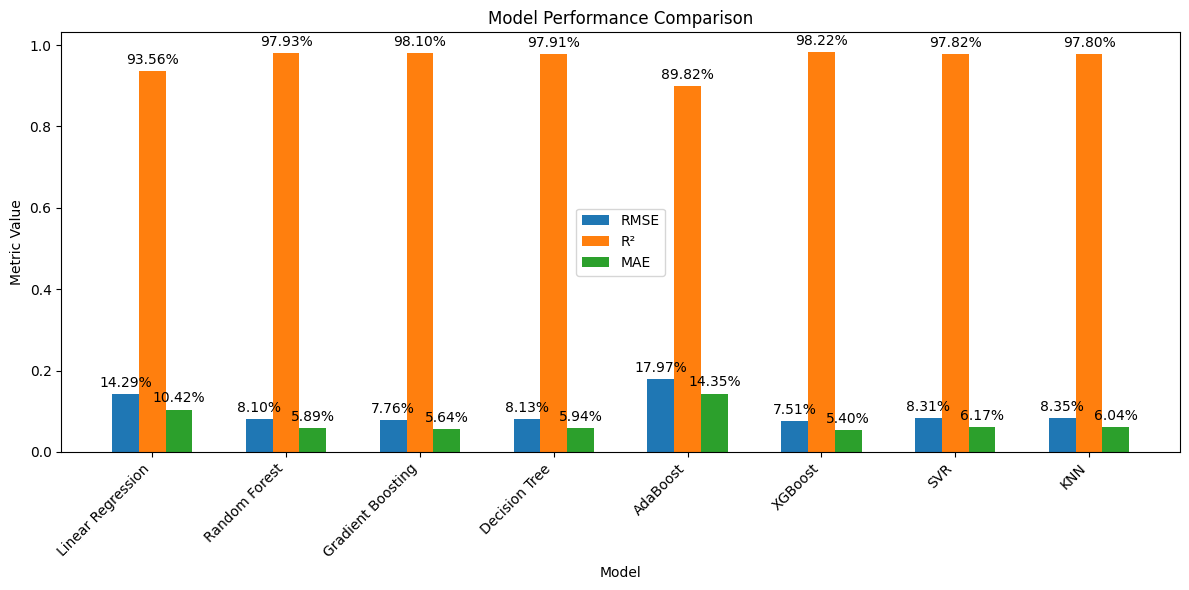

In [ ]:
# Set up the bar positions
bar_width = 0.2
index = np.arange(len(model_names))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(index, rmse_values, bar_width, label='RMSE')
ax.bar(index + bar_width, r2_values, bar_width, label='R²')
ax.bar(index + 2 * bar_width, mae_values, bar_width, label='MAE')

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center the label
    y = height + 0.01  # Adjust vertical position as needed
    label_text = f'{height:.2%}'  # Format as percentage with 2 decimal places
    ax.text(x, y, label_text, ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Metric Value')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# **Ensemble Methods**

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
base_models = [
    ('xgb', XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=1)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=1)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)),
    ('lgb', LGBMRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=1, force_col_wise=True)),
    ('cat', CatBoostRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=1, verbose=0))
]

In [ ]:
stacking_model = StackingRegressor(estimators=base_models, final_estimator=lr_model)

In [ ]:
stacking_model.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 69266, number of used features: 3
[LightGBM] [Info] Start training from score 1.795746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=1, ...)),
                              ('rf', RandomForestRegressor(random_state=1)),
                              ('gb',
                               GradientBoostingRegressor(max_depth=5,
                                                         random_state=1)),
                              ('lgb',
                               LGBMRegressor(force_col_wise=True, max_depth=5,
                                             n_estimators=300,
                                             random_state=1)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x788da1b1ce50>)],
                  final_estimator=LinearRegression())

In [ ]:
stacking_predictions = stacking_model.predict(X_test)

In [ ]:
# Evaluate
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions))
stacking_r2 = r2_score(y_test, stacking_predictions)
stacking_mae = mean_absolute_error(y_test, stacking_predictions)

print(f"Stacking Model Test RMSE: {stacking_rmse:.4f}")
print(f"Stacking Model Test R²: {stacking_r2:.4f}")
print(f"Stacking Model Test MAE: {stacking_mae:.4f}")

Stacking Model Test RMSE: 0.0728
Stacking Model Test R²: 0.9835
Stacking Model Test MAE: 0.0531


# **Cross-Validate the Stacking Model**

In [ ]:
# Create a custom scorer for RMSE (as the default scorer is R²)
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Perform cross-validation
cv_rmse_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring=make_scorer(rmse_scorer))

# Print the average RMSE from cross-validation
print(f"Stacking Model Cross-Validation RMSE (avg): {cv_rmse_scores.mean():.4f}")
print(f"Stacking Model Cross-Validation RMSE (std): {cv_rmse_scores.std():.4f}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# **Cross-Validation on Individual Base Models**

In [ ]:
# Cross-validation for each individual model
for name, model in base_models:
    cv_rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(rmse_scorer))
    print(f"{name} Cross-Validation RMSE (avg): {cv_rmse_scores.mean():.4f}")
    print(f"{name} Cross-Validation RMSE (std): {cv_rmse_scores.std():.4f}")

xgb Cross-Validation RMSE (avg): 0.0752
xgb Cross-Validation RMSE (std): 0.0007
rf Cross-Validation RMSE (avg): 0.0814
rf Cross-Validation RMSE (std): 0.0006
gb Cross-Validation RMSE (avg): 0.0753
gb Cross-Validation RMSE (std): 0.0008
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 55412, number of used features: 3
[LightGBM] [Info] Start training from score 1.794894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
# Create lists to store names and CV results for visualization
model_names = ['Stacking'] + [name for name, _ in base_models]
cv_results = [cv_rmse_scores.mean()]

In [ ]:
# Collect results for the base models
for name, model in base_models:
    cv_rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(rmse_scorer))
    cv_results.append(cv_rmse_scores.mean())

[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 55412, number of used features: 3
[LightGBM] [Info] Start training from score 1.794894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

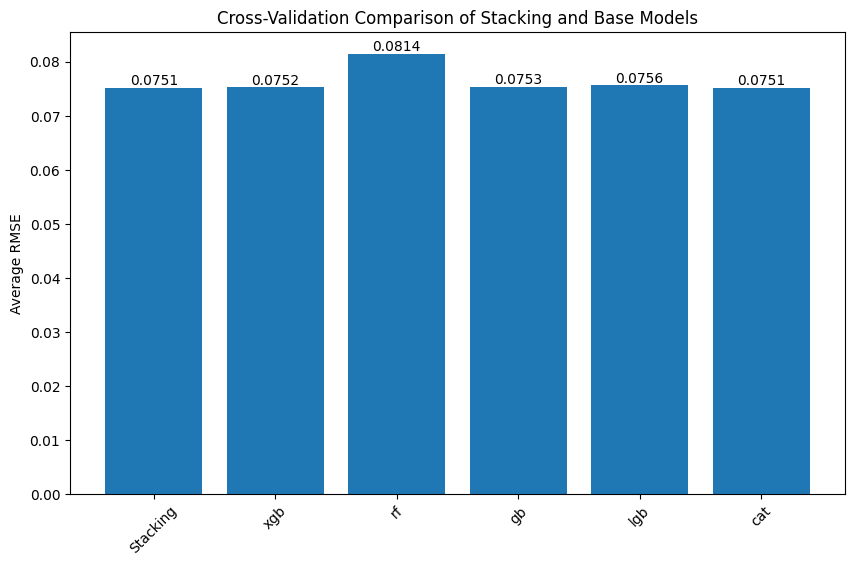

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, cv_results)
plt.ylabel('Average RMSE')
plt.title('Cross-Validation Comparison of Stacking and Base Models')
plt.xticks(rotation=45)

# Display the values at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.show()

# **Feature Importance**



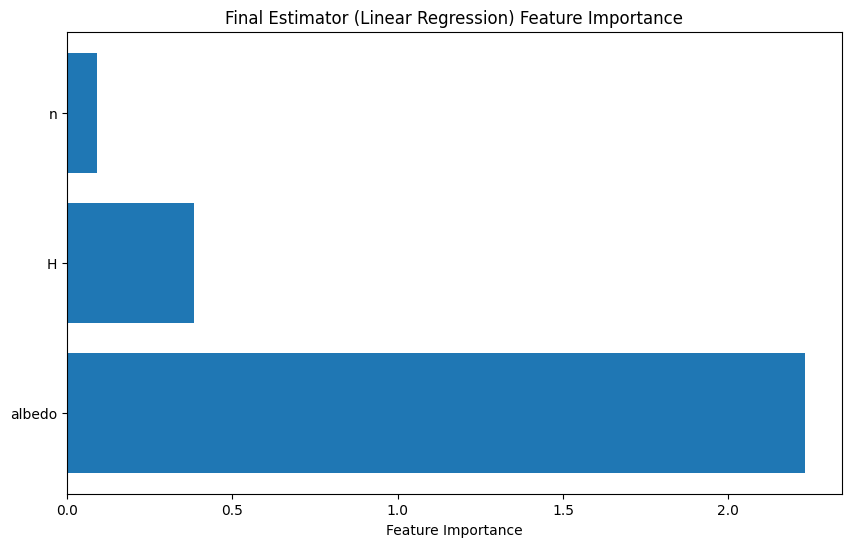

In [ ]:
if isinstance(lr_model, LinearRegression):
    feature_importance_lr = lr_model.coef_
    sorted_idx = np.argsort(np.abs(feature_importance_lr))[::-1]
    sorted_importance_lr = np.abs(feature_importance_lr[sorted_idx])
    sorted_features_lr = X_train.columns[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features_lr, sorted_importance_lr)
    plt.xlabel('Feature Importance')
    plt.title(f'Final Estimator (Linear Regression) Feature Importance')
    plt.show()